In [1]:
# @title Clone GitHub repository, install dependencies and check PyTorch and GPU.
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
!pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-399-g8cc44963 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.1/112.6 GB disk)


In [2]:
# @title Export to ONNX models (object detection)
!python export.py --weights yolov5n.pt --include onnx --simplify
#!python export.py --weights yolov5s.pt --include onnx --simplify
#!python export.py --weights yolov5m.pt --include onnx --simplify
#!python export.py --weights yolov5l.pt --include onnx --simplify
#!python export.py --weights yolov5x.pt --include onnx --simplify

#!python export.py --weights yolov5n.pt --include onnx --imgsz 320 320 --simplify

#!python export.py --weights yolov5n.pt --include onnx # OpenCVDNN NG
#!python export.py --weights yolov5n.pt --include onnx --opset 12 # OpenCVDNN NG
#!python export.py --weights yolov5n.pt --include onnx --simplify # OpenCVDNN OK
#!python export.py --weights yolov5n.pt --include onnx --opset 12 --simplify # OpenCVDNN OK

export: data=data/coco128.yaml, weights=['yolov5n.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, cache=, simplify=True, mlmodel=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5 🚀 v7.0-399-g8cc44963 Python-3.11.11 torch-2.6.0+cu124 CPU

100% 3.87M/3.87M [00:00<00:00, 81.1MB/s]

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients, 4.5 GFLOPs

PyTorch: starting from yolov5n.pt with output shape (1, 25200, 85) (3.9 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 285.1 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 4.5s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ON

detect: weights=['yolov5n.onnx'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-399-g8cc44963 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Loading yolov5n.onnx for ONNX Runtime inference...
requirements: Ultralytics requirement ['onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.8/280.8 MB 229.6 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 11.4s, installed 1 package: ['onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

image 1/2 /content/yolov5/data/images/bus

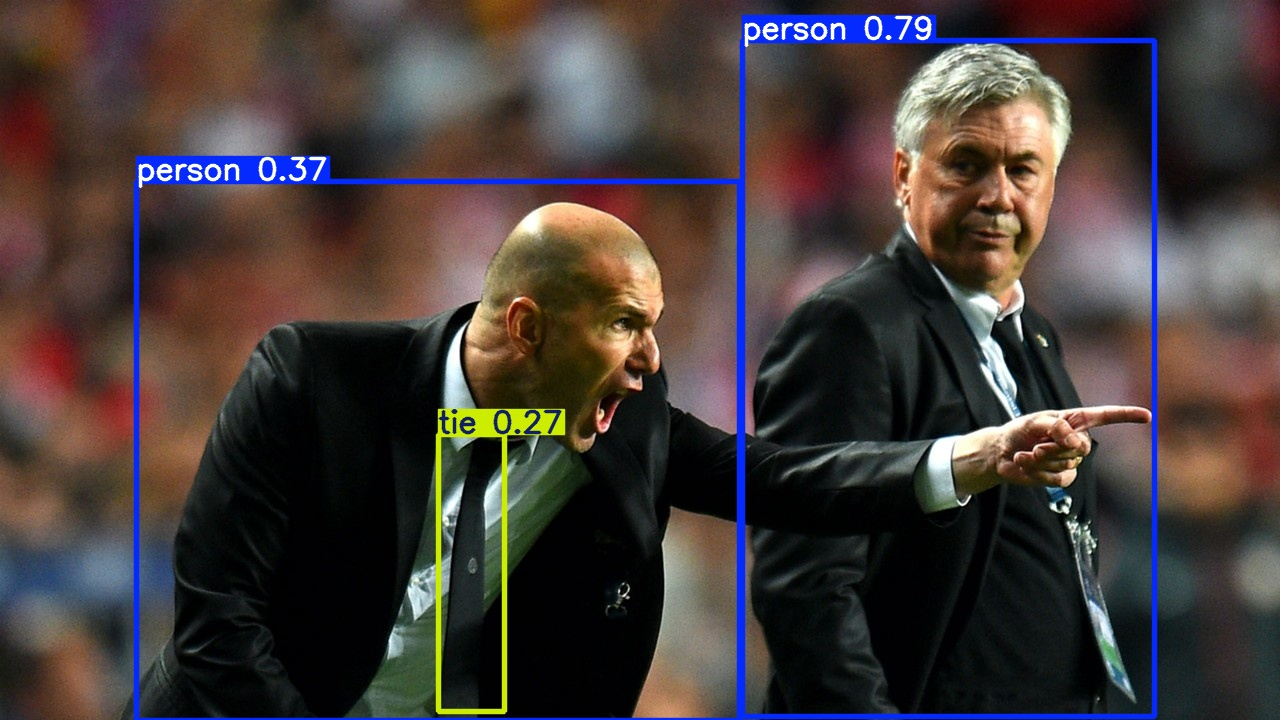

In [3]:
# @title ONNXRuntime Demo
!python detect.py --weights yolov5n.onnx --img 640 --conf 0.25 --source data/images
display.Image(filename='runs/detect/exp/zidane.jpg', width=600)

detect: weights=['yolov5n.onnx'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=True, vid_stride=1
YOLOv5 🚀 v7.0-399-g8cc44963 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Loading yolov5n.onnx for ONNX OpenCV DNN inference...
image 1/2 /content/yolov5/data/images/bus.jpg: 640x640 3 persons, 1 bus, 325.2ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 640x640 2 persons, 1 tie, 303.7ms
Speed: 9.5ms pre-process, 314.5ms inference, 75.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


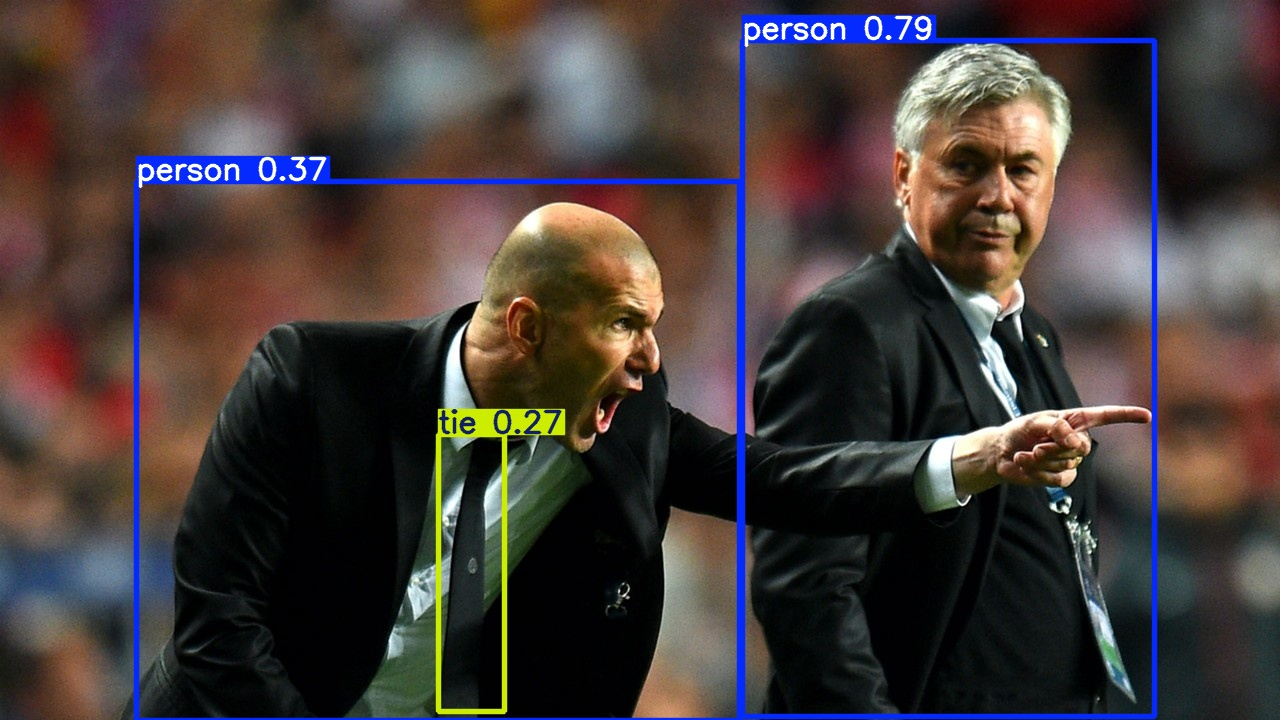

In [4]:
# @title OpenCVDNN Demo
!python detect.py --weights yolov5n.onnx --img 640 --conf 0.25 --source data/images --dnn
display.Image(filename='runs/detect/exp2/zidane.jpg', width=600)